In [1]:
%matplotlib inline

import numpy as np
import torch
import torch.nn as nn
import torch.optim as opt
from torch import Tensor
from torch.autograd import Variable

import matplotlib.pyplot as plt
import gym

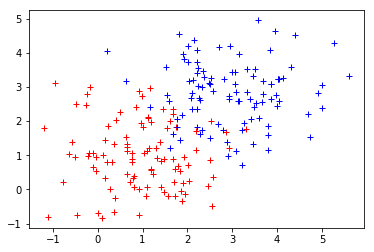

In [3]:
c0_m = [1,1]
c0_c = [[1,0],[0,1]]
c0_s = 100

c1_m = [3,3]
c1_c = [[1,0],[0,1]]
c1_s = 100

c0 = np.random.multivariate_normal(c0_m,c0_c,c0_s)
c1 = np.random.multivariate_normal(c1_m,c1_c,c1_s)
c0 = np.hstack([c0,np.zeros(shape=(len(c0),1))])
c1 = np.hstack([c1,np.ones(shape=(len(c1),1))])
plt.plot(c0[:,0],c0[:,1],'r+')
plt.plot(c1[:,0],c1[:,1],'b+')

In [4]:
dataset = np.vstack([c0,c1])
np.random.shuffle(dataset)
splite_size = int(len(dataset) * 0.7)
training_set = dataset[:splite_size]
test_set = dataset[splite_size:]

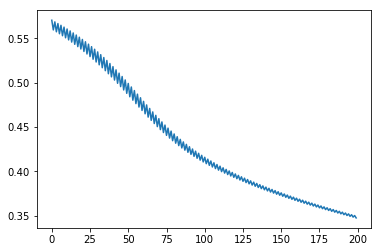

In [6]:
w = Variable(Tensor(np.random.normal(size=(2,1))),requires_grad=True)
b = Variable(Tensor([0]),requires_grad=True)
o = opt.Adam([w,b],lr=0.005)

costs = []
epoch = 100
batch_size = 50
for i in range(epoch):
    for i in range(len(training_set)/batch_size):
        o.zero_grad()
        d = training_set[i:i+batch_size]
        x = Variable(Tensor(d[:,0:2]))
        y = Variable(Tensor(d[:,2]))
        net_input = x.mm(w)
        net_input += b.unsqueeze(0).expand_as(net_input)
        loss = torch.mean(torch.abs(y - torch.sigmoid(net_input)))
        loss.backward()
        costs.append(loss.data.numpy()[0])
        o.step()
        
plt.plot(hist)